In [1]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
# reading data, printing information about columns 
hour = pd.read_csv("hour.csv")
day = pd.read_csv('day.csv')
hour.info()
day.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [3]:
#DATA EXPLORATION

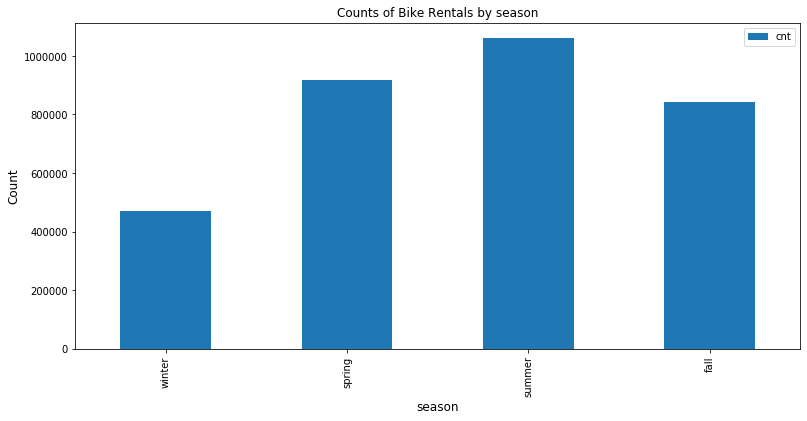

In [4]:
#bike rentals by season
gr = hour[['season','cnt']].groupby(['season']).sum().plot(kind='bar',title ="Counts of Bike Rentals by season",figsize=(13, 6))
gr.set_xlabel("season", fontsize=12)
gr.set_ylabel("Count", fontsize=12)
gr.set_xticklabels(['winter','spring','summer', 'fall'])
plt.show()

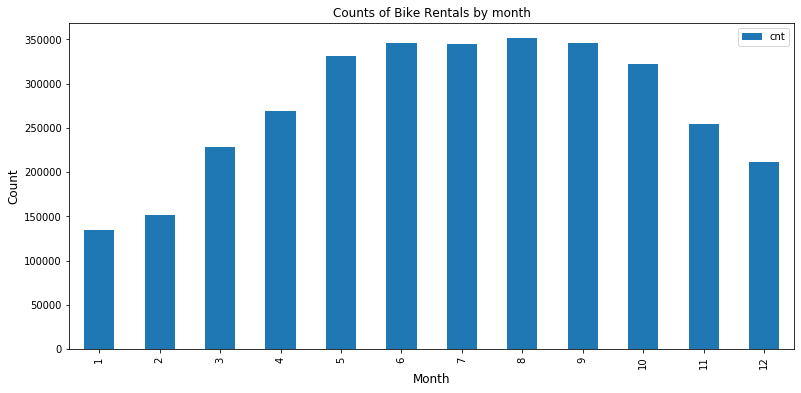

In [5]:
#bike rentals by month
gr = hour[['mnth','cnt']].groupby(['mnth']).sum().plot(kind='bar',title ="Counts of Bike Rentals by month",figsize=(13, 6))
gr.set_xlabel("Month", fontsize=12)
gr.set_ylabel("Count", fontsize=12)

plt.show()

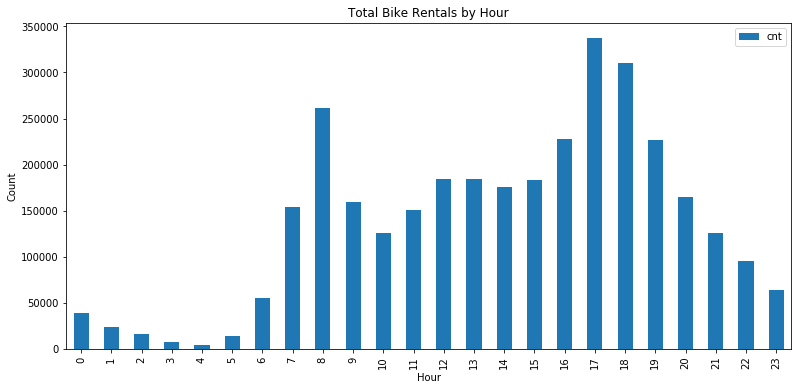

In [6]:
#bike rentals by hours
gr = hour[['hr','cnt']].groupby(['hr']).sum().plot(kind='bar', title ="Total Bike Rentals by Hour",figsize=(13, 6))
gr.set_xlabel("Hour")
gr.set_ylabel("Count")
plt.show()

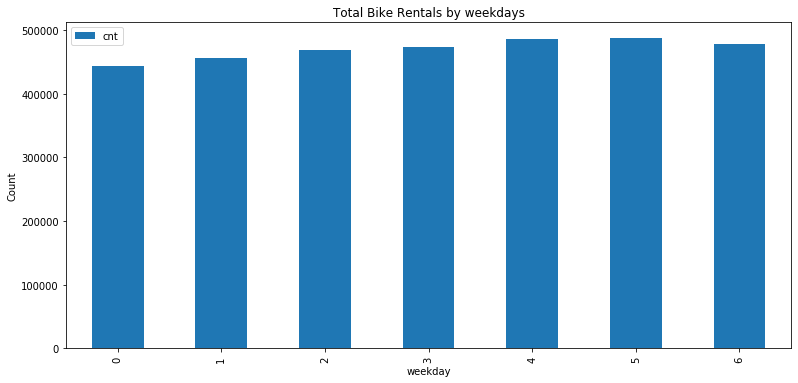

In [7]:
##bike rentals by weekdays
gr = hour[['weekday','cnt']].groupby(['weekday']).sum().plot(kind='bar', title ="Total Bike Rentals by weekdays",figsize=(13, 6))
gr.set_xlabel("weekday")
gr.set_ylabel("Count")
plt.show()

In [8]:
#hourly information about numder of rentals 
hour['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

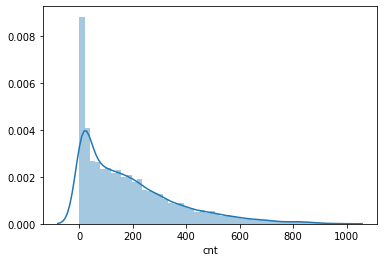

In [9]:
#distribution of rentals per hour
import seaborn as sns
sns.distplot(hour['cnt']);

In [10]:
#Skewness and Kurtosis of hourly rental distribution
print("Skewness: %f" % hour['cnt'].skew())
print("Kurtosis: %f" % hour['cnt'].kurt())


Skewness: 1.277412
Kurtosis: 1.417203


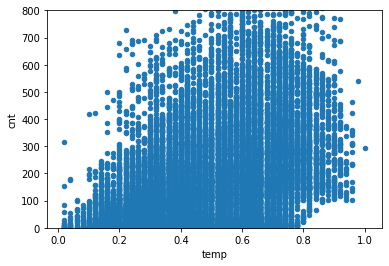

In [11]:
#distribution of rentals by any column. Just put any column name to var
import pandas as pd
var = 'temp'
data = pd.concat([hour['cnt'], hour[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,800));

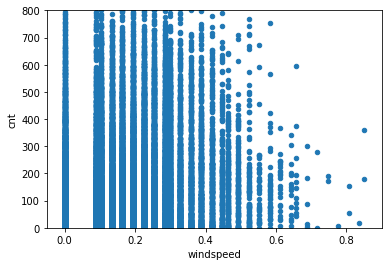

In [12]:
# rentals by wind speed
var = 'windspeed'
data = pd.concat([hour['cnt'], hour[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,800));

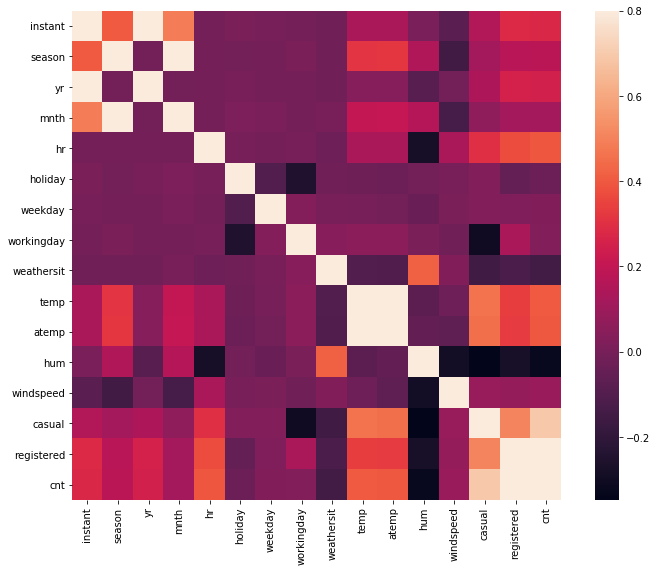

In [13]:
#correlation matrix
corrmat = hour.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [14]:
#missing data
total = hour.isnull().sum().sort_values(ascending=False)
percent = (hour.isnull().sum()/hour.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
cnt,0,0.0
weekday,0,0.0
dteday,0,0.0
season,0,0.0
yr,0,0.0
mnth,0,0.0
hr,0,0.0
holiday,0,0.0
workingday,0,0.0
registered,0,0.0


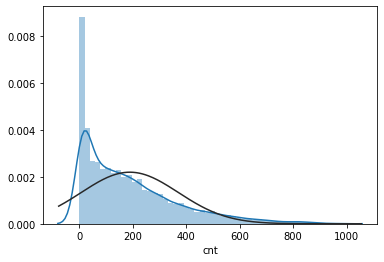

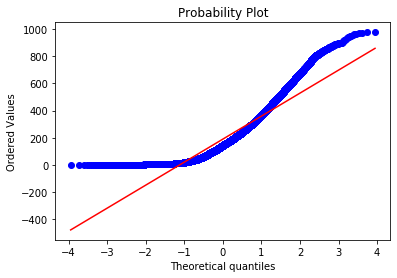

In [15]:
#histogram and normal probability plot
sns.distplot(hour['cnt'], fit=norm);
fig = plt.figure()
res = stats.probplot(hour['cnt'], plot=plt)

In [16]:
#Machine learning

In [17]:
# droping unnesasary data
hour = hour.drop(columns=['dteday','instant','yr','holiday','weekday','weathersit','casual','registered','workingday'])

In [18]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   season     17379 non-null  int64  
 1   mnth       17379 non-null  int64  
 2   hr         17379 non-null  int64  
 3   temp       17379 non-null  float64
 4   atemp      17379 non-null  float64
 5   hum        17379 non-null  float64
 6   windspeed  17379 non-null  float64
 7   cnt        17379 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 1.1 MB


In [19]:
# Normalizing the data and splitting to train and test

x=hour.drop(['cnt'],axis=1)
y=hour['cnt']
x = preprocessing.normalize(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

       Actual   Predicted
6           2  110.411071
9          14  163.453419
12         84  174.703472
17         67  176.375790
18         35  170.438675
...       ...         ...
17366     157  137.552483
17369     247  179.741521
17372     164  192.200297
17373     122  194.089779
17378      49  193.203926

[5214 rows x 2 columns]
Mean Squared Error: 24988.369284145796
R score: 0.26460337067628104
Mean Absolute Error: 118.74872932231195


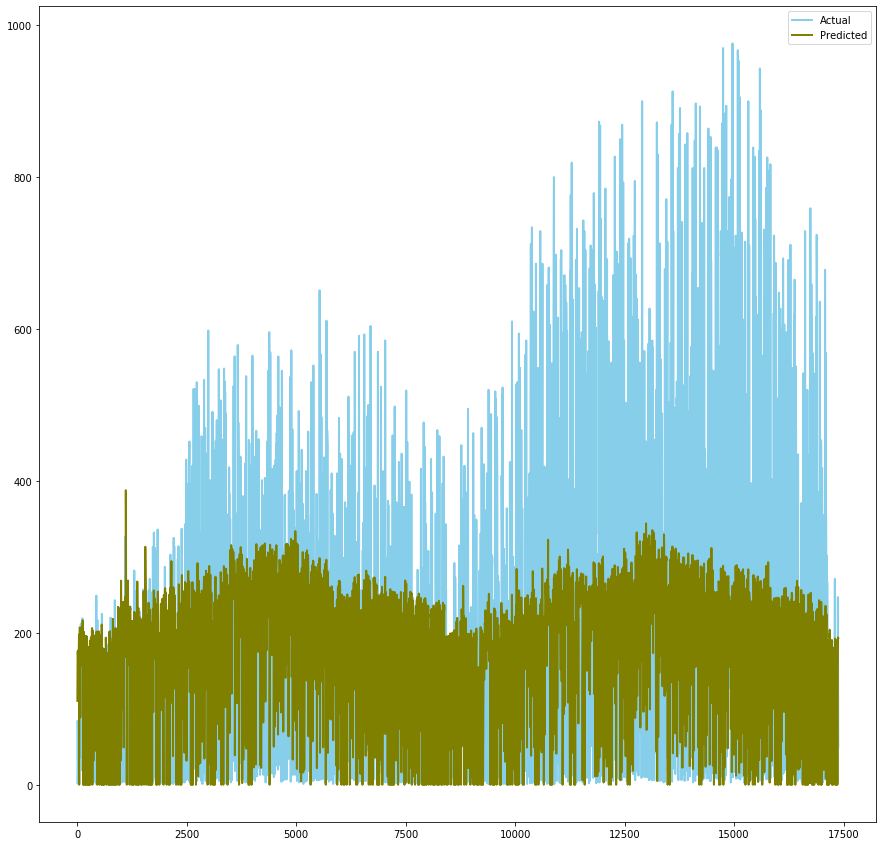

In [23]:
#liner regrestion

linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predicted = linearRegressor.predict(x_test)
    
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted}).sort_index()
df[df < 0] = 0
print(df)

mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)

plt.figure(figsize=(15,15))
plt.plot( 'Actual', data=df, color='skyblue', linewidth=2)
plt.plot( 'Predicted', data=df, marker='', color='olive', linewidth=2)
plt.legend()

print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

In [21]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0, n_estimators=300)
rf.fit(x_train,y_train);
y_predicted_r = rf.predict(x_test)


mse = mean_squared_error(y_test, y_predicted_r)
r = r2_score(y_test, y_predicted_r)
mae = mean_absolute_error(y_test,y_predicted_r)

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted_r}).sort_index()
print(df1)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

       Actual   Predicted
6           2   30.470889
9          14  191.916667
12         84  163.586667
17         67  234.896667
18         35  214.646667
...       ...         ...
17366     157  117.183333
17369     247  216.926667
17372     164  139.200000
17373     122  140.572667
17378      49   22.106667

[5214 rows x 2 columns]
Mean Squared Error: 11714.93622776996
R score: 0.6552346206877
Mean Absolute Error: 72.41592053699543


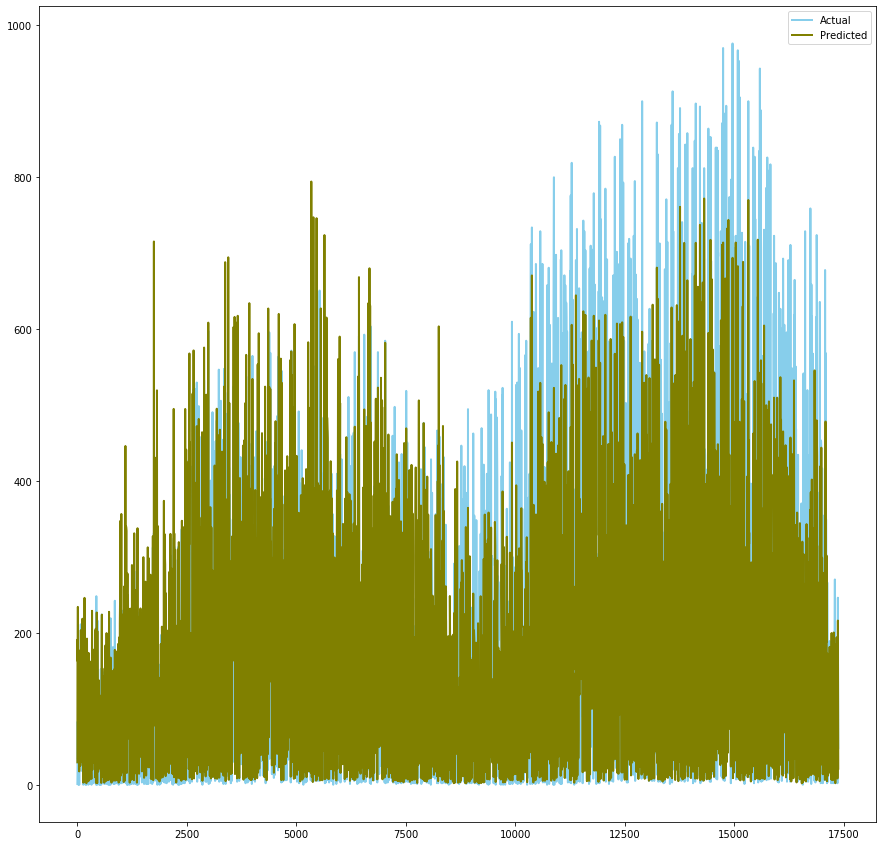

In [22]:
plt.figure(figsize=(15,15))
plt.plot( 'Actual', data=df1, color='skyblue', linewidth=2)
plt.plot( 'Predicted', data=df1, marker='', color='olive', linewidth=2)
plt.legend()


In [26]:
#predict my data from file
x_test1 = pd.read_csv("test.csv")
x_test = preprocessing.normalize(x_test1)
y_predicted_r = rf.predict(x_test)
df2=pd.DataFrame(x_test1, columns=['season','mnth','hr','temp','atemp','hum','windspeed'])
df3=pd.DataFrame(y_predicted_r, columns=['cnt'])
df3.to_csv('out.csv', index = False)